In [1]:
import numpy as np

In [2]:
arr1 = np.array([1,2,3])
arr2 = np.array([4,5,6])

In [3]:
arr1.dot(arr2)

32

In [4]:
arr3 = np.array([1,2,3,4,5,6]).reshape(3,2)
arr3

array([[1, 2],
       [3, 4],
       [5, 6]])

In [5]:
arr3.T

array([[1, 3, 5],
       [2, 4, 6]])

$$
z = w_0x_0 + w_1x_1 + ... + w_mx_m = w^tx = \sum_{j=0}^m{x_jw_j} = w^tx
$$

$$
w_j = w_j + \Delta w_j
$$

###### Perceptron Learning Rule
$$
\Delta w_j = \eta (y^{(i)} - \hat{y}^{(i)}) * x_j^{(i)}
$$

In [6]:
class Perceptron(object):
    """Perceptron classifier.
    
    Parameters
    ----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset.
    
    Attributes
    ----------
    w_: 1d-array
        Weights after fitting.
    errors_: list
        Number of misclassifications in every epoch.
    
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        -------------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number
            of samples and n_features is the number of features.
        y: array-like, shape = [n_samples]
            Target values.
        
        Returns
        ---------
        self: object
        
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [22]:
from sklearn.datasets import load_iris
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
df = load_iris()

In [11]:
data = DataFrame(df['data'])
target = DataFrame(df['target'])

In [12]:
df.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [13]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [119]:
y = target.iloc[0:100].values

In [120]:
y = np.where(y==0, -1, 1)

In [18]:
y[:5]

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1]])

In [19]:
X = data.iloc[0:100, [0,2]].values

In [20]:
X[:5]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4]])

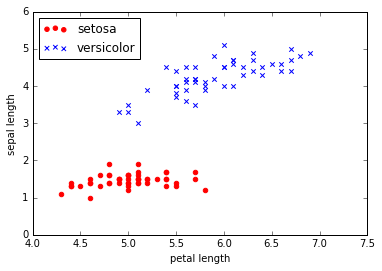

In [23]:
plt.scatter(X[0:50, 0], X[0:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[51:100, 0], X[51:100,1], color='blue', marker='x', label='versicolor')
plt.legend(loc='upper left')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.show()

In [24]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)

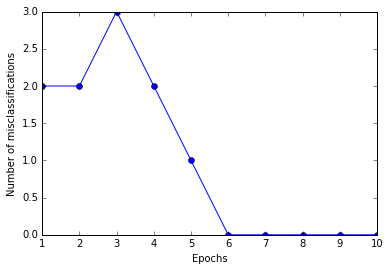

In [25]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [26]:
from matplotlib.colors import ListedColormap

In [130]:
def plot_decision_regions(X, y, clf, resolution=0.05):
    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # Como só há 2 classes em y,
                                                      # as únicas cores que retornam são só (red, blue)
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[:,:1][y == cl], y=X[:,1:][y == cl],
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

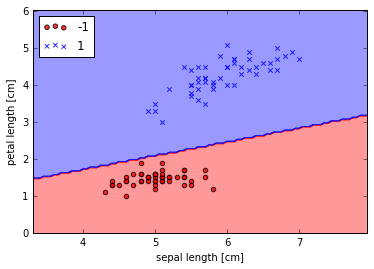

In [152]:
plot_decision_regions(X, y, clf=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### O que meshgrid faz?

In [150]:
print np.arange(0, 10, 1)
print '-'*80
print np.arange(10, 20, 1)

[0 1 2 3 4 5 6 7 8 9]
--------------------------------------------------------------------------------
[10 11 12 13 14 15 16 17 18 19]


In [151]:
x1, x2 = np.meshgrid(np.arange(0, 10, 1), np.arange(10, 20, 1))
print x1
print x2

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]
[[10 10 10 10 10 10 10 10 10 10]
 [11 11 11 11 11 11 11 11 11 11]
 [12 12 12 12 12 12 12 12 12 12]
 [13 13 13 13 13 13 13 13 13 13]
 [14 14 14 14 14 14 14 14 14 14]
 [15 15 15 15 15 15 15 15 15 15]
 [16 16 16 16 16 16 16 16 16 16]
 [17 17 17 17 17 17 17 17 17 17]
 [18 18 18 18 18 18 18 18 18 18]
 [19 19 19 19 19 19 19 19 19 19]]


In [153]:
x1.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9])

### Exemplo de contourf

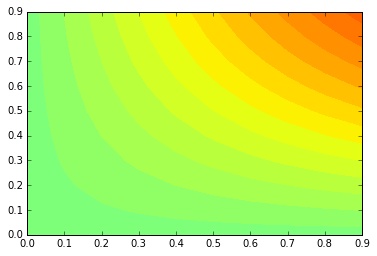

In [171]:
x = np.arange(0,1,.1)
xx, yy = np.meshgrid(x,x)
zz = np.sin(xx) * np.sin(yy)
levels = np.linspace(-1, 1, 40)
plt.contourf(xx, yy, zz, levels)

In [85]:
X.shape

(100L, 2L)

In [86]:
y.shape

(100L, 1L)

In [109]:
x = np.arange(0,20).reshape(10,2)

In [111]:
y = np.arange(0,10)

In [112]:
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [115]:
x[y%2==0,1]

array([ 1,  5,  9, 13, 17])

***